## This notebook assumes you have the following packages installed in your conda environment.

In [41]:
import pandas as pd
import json
import community
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import random
import numpy as np
import randomcolor

In [42]:
df_default = pd.read_csv('../data/signdata-11-5-20.csv')
df_default.shape

(2723, 191)

In [43]:
df_subset = df_default[['EntryID', 'LemmaID','Code','YouTube Video', 'VimeoVideo', 'Phonological Complexity']]
df_subset

,EntryID,LemmaID,Code,YouTube Video,VimeoVideo,Phonological Complexity
0,1_dollar,1_dollar,C_02_025,"<iframe width=""280"" height=""158"" src=""https://...",https://player.vimeo.com/video/345587917,2.0
1,5_dollars,5_dollars,B_01_062,"<iframe width=""280"" height=""158"" src=""https://...",https://player.vimeo.com/video/344399314,1.0
2,8_hour,8_hour,C_02_055,"<iframe width=""280"" height=""158"" src=""https://...",https://player.vimeo.com/video/345588916,4.0
3,9_oclock,9_oclock,C_02_080,"<iframe width=""280"" height=""158"" src=""https://...",https://player.vimeo.com/video/345589804,1.0
4,a-line_bob,a-line_bob,K_03_127,NaN,https://player.vimeo.com/video/342308099,2.0
...,...,...,...,...,...,...
2718,zero,zero,D_03_036,"<iframe width=""280"" height=""158"" src=""https://...",https://player.vimeo.com/video/345983725,1.0
2719,zipper,zipper,D_01_034,"<iframe width=""280"" height=""158"" src=""https://...",https://player.vimeo.com/video/345804301,1.0
2720,zoo,zoo,E_03_042,"<iframe width=""280"" height=""158"" src=""https://...",https://player.vimeo.com/video/346067693,3.0
2721,zoom_in,zoom_in,B_02_056,"<iframe width=""280"" height=""158"" src=""https://...",https://player.vimeo.com/video/345555455,1.0


In [44]:
df_subset.to_csv('signdata_with_urls.csv')

In [45]:
df_default["Code"].values

array(['C_02_025', 'B_01_062', 'C_02_055', ..., 'E_03_042', 'B_02_056',
       'D_01_057'], dtype=object)

## Community Analysis

In [46]:
edges_df = pd.read_csv('../data/generated-data/default-neighbors.csv') 
edges_df = edges_df.rename(columns={"neighbor": "source"})
edges_df.head()


,target,source,num_matched_features,matched_features,num_missed_features,missed_features
0,A_01_002,B_01_062,12,"SignType.2.0, MinorLocation.2.0, Movement.2.0,...",1,RepeatedMovement.2.0
1,A_01_002,C_03_023,12,"SignType.2.0, MinorLocation.2.0, Movement.2.0,...",1,Flexion.2.0
2,A_01_002,G_01_038,12,"SignType.2.0, MinorLocation.2.0, Contact.2.0, ...",1,Movement.2.0
3,A_01_002,J_03_046,12,"SignType.2.0, MinorLocation.2.0, Movement.2.0,...",1,RepeatedMovement.2.0
4,A_01_003,D_02_047,14,"SignType.2.0, MinorLocation.2.0, Movement.2.0,...",0,NaN


In [47]:
edges_df.shape

(13556, 6)

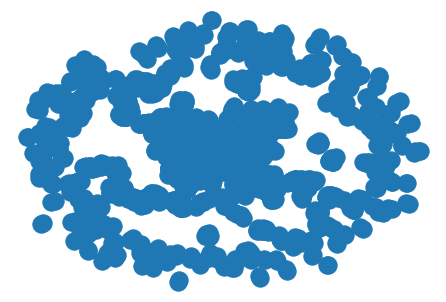

In [48]:
g = nx.from_pandas_edgelist(edges_df, source='source', target='target') 
nx.draw(g)

In [49]:
#first compute the best partition
# from community import greedy_modularity_communities
import community

G = g

#Two methods for community analysis
# c = greedy_modularity_communities(G)
partition = community.best_partition(G)

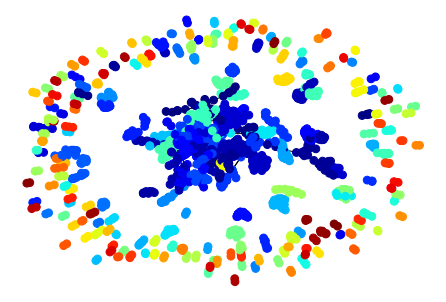

In [50]:
values = [partition.get(node) for node in G.nodes()]

nx.draw_spring(G, cmap = plt.get_cmap('jet'), node_color = values, node_size=60, with_labels=False)

In [51]:
# num_nodes = 0
# for community in c:
#     num_nodes += len(community)
# print(num_nodes)

In [52]:
len(partition)

2068

In [53]:
#Noes only connected by edges. Does not include standalone nodes.

list = partition.items()
print(len(list))
df_with_groupids = pd.DataFrame(list, columns=['Code', 'group_id'])
df_with_groupids.head()

2068


,Code,group_id
0,B_01_062,0
1,A_01_002,0
2,C_03_023,0
3,G_01_038,0
4,J_03_046,0


In [54]:
# get edges only where source and target nodes belong to a valid community for now. This is to assign them group ids.
nodes_in_communities = df_with_groupids['Code'].unique()
edges_for_community_nodes_df = edges_df.loc[edges_df['source'].isin(nodes_in_communities) & edges_df['target'].isin(nodes_in_communities)]
print(len(edges_for_community_nodes_df['source'].unique()))
print(edges_df.shape)
print(edges_for_community_nodes_df.shape)
edges_for_community_nodes_df.head()

2068
(13556, 6)
(13556, 6)


,target,source,num_matched_features,matched_features,num_missed_features,missed_features
0,A_01_002,B_01_062,12,"SignType.2.0, MinorLocation.2.0, Movement.2.0,...",1,RepeatedMovement.2.0
1,A_01_002,C_03_023,12,"SignType.2.0, MinorLocation.2.0, Movement.2.0,...",1,Flexion.2.0
2,A_01_002,G_01_038,12,"SignType.2.0, MinorLocation.2.0, Contact.2.0, ...",1,Movement.2.0
3,A_01_002,J_03_046,12,"SignType.2.0, MinorLocation.2.0, Movement.2.0,...",1,RepeatedMovement.2.0
4,A_01_003,D_02_047,14,"SignType.2.0, MinorLocation.2.0, Movement.2.0,...",0,NaN


In [55]:

df_merged = pd.merge(df_default, df_with_groupids,how='left', on=['Code'])
print(df_merged.shape)
#print(df_merged.columns.values)
df_merged.head(20)

(2723, 192)


,EntryID,LemmaID,Code,Batch,List,Item,YouTube Video,VimeoVideoHTML,VimeoVideo,SubtLexUSLog10WF,...,SignBankEnglishTranslations,SignBankLemmaID,SignBankReferenceID,bglm_aoa,empirical_aoa,HandshapeImage - 100x100,HandshapeImage: URL,Parameter.Neighborhood.Density.2.0.1,SignBankSemanticField,group_id
0,1_dollar,1_dollar,C_02_025,C,2.0,25.0,"<iframe width=""280"" height=""158"" src=""https://...",<iframe src=https://player.vimeo.com/video/345...,https://player.vimeo.com/video/345587917,NaN,...,"bill, cash, dollar, money",1_DOLLAR,1268.0,NaN,NaN,NaN,NaN,383,None,NaN
1,5_dollars,5_dollars,B_01_062,B,1.0,62.0,"<iframe width=""280"" height=""158"" src=""https://...",<iframe src=https://player.vimeo.com/video/344...,https://player.vimeo.com/video/344399314,NaN,...,"dollar, five dollars, money",5_DOLLAR,2436.0,NaN,NaN,NaN,NaN,190,Number,0.0
2,8_hour,8_hour,C_02_055,C,2.0,55.0,"<iframe width=""280"" height=""158"" src=""https://...","<iframe src=""https://player.vimeo.com/video/34...",https://player.vimeo.com/video/345588916,NaN,...,"eight hours, 8 hours, hour, time",NUMBER-HOURS,2437.0,NaN,NaN,NaN,NaN,129,Number,NaN
3,9_oclock,9_oclock,C_02_080,C,2.0,80.0,"<iframe width=""280"" height=""158"" src=""https://...",<iframe src=https://player.vimeo.com/video/345...,https://player.vimeo.com/video/345589804,NaN,...,"9:00, 9 o'clock, nine o'clock, o'clock, time",OCLOCK-NUMBER,2857.0,NaN,NaN,NaN,NaN,48,None,141.0
4,a-line_bob,a-line_bob,K_03_127,K,NaN,NaN,NaN,<iframe src=https://player.vimeo.com/video/342...,https://player.vimeo.com/video/342308099,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,158,NaN,92.0
5,a_little_bit,a_little_bit,H_03_025,H,3.0,25.0,"<iframe width=""280"" height=""158"" src=""https://...",<iframe src=https://player.vimeo.com/video/346...,https://player.vimeo.com/video/346887448,NaN,...,"a little bit, little, few, minimal, scarce",A-LITTLE-BIT,0.0,NaN,NaN,NaN,NaN,144,Attribute,39.0
6,abbreviate,abbreviate,G_01_040,G,1.0,40.0,"<iframe width=""280"" height=""158"" src=""https://...",<iframe src=https://player.vimeo.com/video/346...,https://player.vimeo.com/video/346610443,0.301,...,"brief, for a short time, quick, short, shortly",SHORT,252.0,NaN,NaN,NaN,NaN,368,Attribute,8.0
7,about_1,about,B_02_072,B,2.0,72.0,"<iframe width=""280"" height=""158"" src=""https://...",<iframe src=https://player.vimeo.com/video/345...,https://player.vimeo.com/video/345555837,5.268,...,"about, regarding, with reference to",ABOUT,2043.0,NaN,NaN,NaN,NaN,129,Locative,110.0
8,about_2,about,B_02_003,B,2.0,3.0,"<iframe width=""280"" height=""158"" src=""https://...",<iframe src=https://player.vimeo.com/video/345...,https://player.vimeo.com/video/345536316,5.268,...,"about, regarding, with reference to",ABOUT,2042.0,61.0,35.0,NaN,NaN,129,Locative,NaN
9,absolutely_nothing,absolutely_nothing,J_01_027,J,1.0,27.0,"<iframe width=""280"" height=""158"" src=""https://...",<iframe src=https://player.vimeo.com/video/346...,https://player.vimeo.com/video/346914407,NaN,...,"absolutely nothing, all out, depleted, empty, ...",ABSOLUTELY-NOTHING,2044.0,NaN,NaN,NaN,NaN,232,Attribute,186.0


In [56]:
values = {'group_id': 1000}
df_merged = df_merged.fillna(value=values)

print(df_merged['group_id'])
unique_community_ids = df_merged['group_id'].unique()
unique_community_ids

0       1000.0
1          0.0
2       1000.0
3        141.0
4         92.0
         ...  
2718      16.0
2719    1000.0
2720      10.0
2721    1000.0
2722    1000.0
Name: group_id, Length: 2723, dtype: float64


array([1000.,    0.,  141.,   92.,   39.,    8.,  110.,  186.,    9.,
        217.,    5.,  108.,   43.,   79.,  117.,   11.,    2.,    4.,
         41.,   95.,   78.,   16.,  109.,   10.,   63.,  119.,   26.,
        173.,   87.,   27.,   13.,   45.,  135.,   57.,   69.,  204.,
         22.,    1.,  162.,   31.,   90.,  131.,   83.,  164.,   35.,
        214.,   66.,   38.,  174.,  156.,   98.,   52.,   29.,  124.,
         46.,   89.,  213.,  201.,   50.,  137.,   76.,   23.,  152.,
         30.,   91.,  168.,  114.,  126.,  207.,   65.,   20.,  100.,
        196.,   36.,  219.,   40.,   85.,   18.,   15.,   34.,  149.,
         19.,   80.,   68.,   64.,  115.,   25.,   96.,   94.,    3.,
          7.,   93.,  148.,  177.,  113.,  172.,  128.,   21.,  106.,
        146.,   17.,  105.,   48.,  129.,  133.,  107.,  158.,  145.,
        157.,   44.,   12.,  194.,   67.,   62.,  136.,   42.,  130.,
        112.,  144.,  206.,  211.,  216.,   73.,   32.,  190.,  191.,
         51.,  101.,

In [57]:

#Will assign all NaN's same color for now. That's okay.


import random
 
def colors(n):
    if(n == 0):
        n = 600
    r = int(random.random() * 256)
    g = int(random.random() * 256)
    b = int(random.random() * 256)
    
    step = 256 / n
#     print(n,r,g,b,step)

    r += step
    g += step
    b += step
    r = int(r) % 256
    g = int(g) % 256
    b = int(b) % 256
    
    colorstr = str(r)+","+str(b)+"," + str(g)
    return '#%02x%02x%02x' % (r, g, b)

color_dict = []
color_dictionary = {}
for groupid in unique_community_ids:
    #generate a random color
    color = colors(groupid)
    if(groupid == 1000):        
        color_dict.append({'group_id': 1000, 'color_code': color})
        color_dictionary['island'] = color
    else:        
        color_dict.append({'group_id':groupid , 'color_code': color})
        color_dictionary[str(int(groupid))] = color
    
color_dict

[{'group_id': 1000, 'color_code': '#c803dc'},
 {'group_id': 0.0, 'color_code': '#bd99f4'},
 {'group_id': 141.0, 'color_code': '#4e3101'},
 {'group_id': 92.0, 'color_code': '#f6d8d0'},
 {'group_id': 39.0, 'color_code': '#82614e'},
 {'group_id': 8.0, 'color_code': '#93a965'},
 {'group_id': 110.0, 'color_code': '#3fa27e'},
 {'group_id': 186.0, 'color_code': '#1b606d'},
 {'group_id': 9.0, 'color_code': '#89d812'},
 {'group_id': 217.0, 'color_code': '#97165f'},
 {'group_id': 5.0, 'color_code': '#8d89c9'},
 {'group_id': 108.0, 'color_code': '#f4dbbf'},
 {'group_id': 43.0, 'color_code': '#ddc9a2'},
 {'group_id': 79.0, 'color_code': '#b412d4'},
 {'group_id': 117.0, 'color_code': '#6dcd66'},
 {'group_id': 11.0, 'color_code': '#963168'},
 {'group_id': 2.0, 'color_code': '#daa0c0'},
 {'group_id': 4.0, 'color_code': '#ea117b'},
 {'group_id': 41.0, 'color_code': '#3745dc'},
 {'group_id': 95.0, 'color_code': '#774e8b'},
 {'group_id': 78.0, 'color_code': '#e31334'},
 {'group_id': 16.0, 'color_code': 

In [58]:
from IPython.display import Markdown
for color in color_dict:
    display (Markdown('<br><span style="color:' +color['color_code']+ '">Sample</span>.'))
    


<br><span style="color:#c803dc">Sample</span>.

<br><span style="color:#bd99f4">Sample</span>.

<br><span style="color:#4e3101">Sample</span>.

<br><span style="color:#f6d8d0">Sample</span>.

<br><span style="color:#82614e">Sample</span>.

<br><span style="color:#93a965">Sample</span>.

<br><span style="color:#3fa27e">Sample</span>.

<br><span style="color:#1b606d">Sample</span>.

<br><span style="color:#89d812">Sample</span>.

<br><span style="color:#97165f">Sample</span>.

<br><span style="color:#8d89c9">Sample</span>.

<br><span style="color:#f4dbbf">Sample</span>.

<br><span style="color:#ddc9a2">Sample</span>.

<br><span style="color:#b412d4">Sample</span>.

<br><span style="color:#6dcd66">Sample</span>.

<br><span style="color:#963168">Sample</span>.

<br><span style="color:#daa0c0">Sample</span>.

<br><span style="color:#ea117b">Sample</span>.

<br><span style="color:#3745dc">Sample</span>.

<br><span style="color:#774e8b">Sample</span>.

<br><span style="color:#e31334">Sample</span>.

<br><span style="color:#788395">Sample</span>.

<br><span style="color:#b7da91">Sample</span>.

<br><span style="color:#138d2a">Sample</span>.

<br><span style="color:#d2a5dd">Sample</span>.

<br><span style="color:#eb1e40">Sample</span>.

<br><span style="color:#4fb11d">Sample</span>.

<br><span style="color:#88b595">Sample</span>.

<br><span style="color:#ee259c">Sample</span>.

<br><span style="color:#b73475">Sample</span>.

<br><span style="color:#3c722b">Sample</span>.

<br><span style="color:#2045a2">Sample</span>.

<br><span style="color:#6ca8fe">Sample</span>.

<br><span style="color:#2136e8">Sample</span>.

<br><span style="color:#b2e0e1">Sample</span>.

<br><span style="color:#842cd6">Sample</span>.

<br><span style="color:#45f694">Sample</span>.

<br><span style="color:#004611">Sample</span>.

<br><span style="color:#c56787">Sample</span>.

<br><span style="color:#af4926">Sample</span>.

<br><span style="color:#9adfab">Sample</span>.

<br><span style="color:#b6cc2a">Sample</span>.

<br><span style="color:#3aeaff">Sample</span>.

<br><span style="color:#851eef">Sample</span>.

<br><span style="color:#5c5852">Sample</span>.

<br><span style="color:#34cea0">Sample</span>.

<br><span style="color:#a3a0ab">Sample</span>.

<br><span style="color:#8b8341">Sample</span>.

<br><span style="color:#687694">Sample</span>.

<br><span style="color:#16930b">Sample</span>.

<br><span style="color:#8a9dfd">Sample</span>.

<br><span style="color:#61bad7">Sample</span>.

<br><span style="color:#6753de">Sample</span>.

<br><span style="color:#ae6f1c">Sample</span>.

<br><span style="color:#68bb4f">Sample</span>.

<br><span style="color:#8c9347">Sample</span>.

<br><span style="color:#6735d1">Sample</span>.

<br><span style="color:#2c535b">Sample</span>.

<br><span style="color:#c770d7">Sample</span>.

<br><span style="color:#483233">Sample</span>.

<br><span style="color:#6b0b3f">Sample</span>.

<br><span style="color:#830c1c">Sample</span>.

<br><span style="color:#022fa4">Sample</span>.

<br><span style="color:#2a4c60">Sample</span>.

<br><span style="color:#4ef59a">Sample</span>.

<br><span style="color:#44997e">Sample</span>.

<br><span style="color:#e85660">Sample</span>.

<br><span style="color:#b9cbdb">Sample</span>.

<br><span style="color:#3d0860">Sample</span>.

<br><span style="color:#34a38e">Sample</span>.

<br><span style="color:#230177">Sample</span>.

<br><span style="color:#0a88d4">Sample</span>.

<br><span style="color:#5dff43">Sample</span>.

<br><span style="color:#47319a">Sample</span>.

<br><span style="color:#5371c6">Sample</span>.

<br><span style="color:#4f491c">Sample</span>.

<br><span style="color:#a932b6">Sample</span>.

<br><span style="color:#6ad792">Sample</span>.

<br><span style="color:#945550">Sample</span>.

<br><span style="color:#4abc46">Sample</span>.

<br><span style="color:#d104e8">Sample</span>.

<br><span style="color:#a6290d">Sample</span>.

<br><span style="color:#a1b7f3">Sample</span>.

<br><span style="color:#bccca7">Sample</span>.

<br><span style="color:#6366a2">Sample</span>.

<br><span style="color:#c391d0">Sample</span>.

<br><span style="color:#c77a3a">Sample</span>.

<br><span style="color:#bdf3a7">Sample</span>.

<br><span style="color:#ab9a69">Sample</span>.

<br><span style="color:#02db86">Sample</span>.

<br><span style="color:#be1e2f">Sample</span>.

<br><span style="color:#653ba9">Sample</span>.

<br><span style="color:#6e95b6">Sample</span>.

<br><span style="color:#956e05">Sample</span>.

<br><span style="color:#25c60d">Sample</span>.

<br><span style="color:#346956">Sample</span>.

<br><span style="color:#165fda">Sample</span>.

<br><span style="color:#383e6c">Sample</span>.

<br><span style="color:#131f2f">Sample</span>.

<br><span style="color:#e8f2f2">Sample</span>.

<br><span style="color:#e7812b">Sample</span>.

<br><span style="color:#a5d86a">Sample</span>.

<br><span style="color:#f741bd">Sample</span>.

<br><span style="color:#8c826e">Sample</span>.

<br><span style="color:#c5e318">Sample</span>.

<br><span style="color:#172ee5">Sample</span>.

<br><span style="color:#d81967">Sample</span>.

<br><span style="color:#40a44b">Sample</span>.

<br><span style="color:#420c28">Sample</span>.

<br><span style="color:#ced9c2">Sample</span>.

<br><span style="color:#02a062">Sample</span>.

<br><span style="color:#3415f7">Sample</span>.

<br><span style="color:#b64fbd">Sample</span>.

<br><span style="color:#c6dd1f">Sample</span>.

<br><span style="color:#1d53aa">Sample</span>.

<br><span style="color:#c0accc">Sample</span>.

<br><span style="color:#a800e0">Sample</span>.

<br><span style="color:#b472f6">Sample</span>.

<br><span style="color:#1a18b1">Sample</span>.

<br><span style="color:#ca0dd8">Sample</span>.

<br><span style="color:#642fdc">Sample</span>.

<br><span style="color:#b451bc">Sample</span>.

<br><span style="color:#b90949">Sample</span>.

<br><span style="color:#48b81a">Sample</span>.

<br><span style="color:#0d7cad">Sample</span>.

<br><span style="color:#9bc3b5">Sample</span>.

<br><span style="color:#28d137">Sample</span>.

<br><span style="color:#c6393b">Sample</span>.

<br><span style="color:#09904f">Sample</span>.

<br><span style="color:#c6a54c">Sample</span>.

<br><span style="color:#2cd48a">Sample</span>.

<br><span style="color:#958a29">Sample</span>.

<br><span style="color:#179ca5">Sample</span>.

<br><span style="color:#3a7416">Sample</span>.

<br><span style="color:#a139aa">Sample</span>.

<br><span style="color:#9c95bd">Sample</span>.

<br><span style="color:#61cf67">Sample</span>.

<br><span style="color:#9b5da7">Sample</span>.

<br><span style="color:#7e1741">Sample</span>.

<br><span style="color:#1a76de">Sample</span>.

<br><span style="color:#28141d">Sample</span>.

<br><span style="color:#ae2676">Sample</span>.

<br><span style="color:#cb9041">Sample</span>.

<br><span style="color:#e13229">Sample</span>.

<br><span style="color:#eeff57">Sample</span>.

<br><span style="color:#e65f2a">Sample</span>.

<br><span style="color:#d552b4">Sample</span>.

<br><span style="color:#8185d4">Sample</span>.

<br><span style="color:#11c5d6">Sample</span>.

<br><span style="color:#48f54b">Sample</span>.

<br><span style="color:#4bbac2">Sample</span>.

<br><span style="color:#fd60cb">Sample</span>.

<br><span style="color:#7e13fd">Sample</span>.

<br><span style="color:#0ebb8f">Sample</span>.

<br><span style="color:#5e90c3">Sample</span>.

<br><span style="color:#7582aa">Sample</span>.

<br><span style="color:#8bf5c3">Sample</span>.

<br><span style="color:#c8b321">Sample</span>.

<br><span style="color:#67c432">Sample</span>.

<br><span style="color:#f6cd4a">Sample</span>.

<br><span style="color:#87f520">Sample</span>.

<br><span style="color:#c65a9d">Sample</span>.

<br><span style="color:#0efdcd">Sample</span>.

<br><span style="color:#fb1935">Sample</span>.

<br><span style="color:#3db85e">Sample</span>.

<br><span style="color:#cc9dc3">Sample</span>.

<br><span style="color:#a0f92a">Sample</span>.

<br><span style="color:#fb9f91">Sample</span>.

<br><span style="color:#4ae0c6">Sample</span>.

<br><span style="color:#58e639">Sample</span>.

<br><span style="color:#b67488">Sample</span>.

<br><span style="color:#bc0392">Sample</span>.

<br><span style="color:#e3629e">Sample</span>.

<br><span style="color:#6d2c22">Sample</span>.

<br><span style="color:#6b5340">Sample</span>.

<br><span style="color:#99114e">Sample</span>.

<br><span style="color:#175f52">Sample</span>.

<br><span style="color:#190c64">Sample</span>.

<br><span style="color:#284b45">Sample</span>.

<br><span style="color:#4c3235">Sample</span>.

<br><span style="color:#65832a">Sample</span>.

<br><span style="color:#044ac0">Sample</span>.

<br><span style="color:#db3493">Sample</span>.

<br><span style="color:#288841">Sample</span>.

<br><span style="color:#7a008a">Sample</span>.

<br><span style="color:#271bc1">Sample</span>.

<br><span style="color:#9b2e0a">Sample</span>.

<br><span style="color:#b900c4">Sample</span>.

<br><span style="color:#3b88a2">Sample</span>.

<br><span style="color:#43c9ae">Sample</span>.

<br><span style="color:#e6dc7e">Sample</span>.

<br><span style="color:#50300b">Sample</span>.

<br><span style="color:#25f6f9">Sample</span>.

<br><span style="color:#847e32">Sample</span>.

<br><span style="color:#57455e">Sample</span>.

<br><span style="color:#d184e4">Sample</span>.

<br><span style="color:#27c32d">Sample</span>.

<br><span style="color:#6e9172">Sample</span>.

<br><span style="color:#f98266">Sample</span>.

<br><span style="color:#a13cf2">Sample</span>.

<br><span style="color:#4c566b">Sample</span>.

<br><span style="color:#f911cb">Sample</span>.

<br><span style="color:#60e8e8">Sample</span>.

<br><span style="color:#14b702">Sample</span>.

<br><span style="color:#f04be7">Sample</span>.

<br><span style="color:#754a45">Sample</span>.

<br><span style="color:#2cf679">Sample</span>.

<br><span style="color:#7a7224">Sample</span>.

<br><span style="color:#0f20fd">Sample</span>.

<br><span style="color:#0e6627">Sample</span>.

<br><span style="color:#299de4">Sample</span>.

<br><span style="color:#c38d6f">Sample</span>.

<br><span style="color:#210069">Sample</span>.

<br><span style="color:#9f57b7">Sample</span>.

<br><span style="color:#73e8bc">Sample</span>.

<br><span style="color:#3adf7b">Sample</span>.

<br><span style="color:#c2a830">Sample</span>.

<br><span style="color:#0718aa">Sample</span>.

<br><span style="color:#5b2c28">Sample</span>.

<br><span style="color:#6adeed">Sample</span>.

<br><span style="color:#f6f3a3">Sample</span>.

<br><span style="color:#44f0d3">Sample</span>.

In [59]:
color_df = pd.DataFrame(color_dict)
df_merged_with_color = pd.merge(df_merged, color_df,how='left', on=['group_id'])
print(df_merged_with_color.shape)
df_merged_with_color.head()


(2723, 193)


,EntryID,LemmaID,Code,Batch,List,Item,YouTube Video,VimeoVideoHTML,VimeoVideo,SubtLexUSLog10WF,...,SignBankLemmaID,SignBankReferenceID,bglm_aoa,empirical_aoa,HandshapeImage - 100x100,HandshapeImage: URL,Parameter.Neighborhood.Density.2.0.1,SignBankSemanticField,group_id,color_code
0,1_dollar,1_dollar,C_02_025,C,2.0,25.0,"<iframe width=""280"" height=""158"" src=""https://...",<iframe src=https://player.vimeo.com/video/345...,https://player.vimeo.com/video/345587917,NaN,...,1_DOLLAR,1268.0,NaN,NaN,NaN,NaN,383,None,1000.0,#c803dc
1,5_dollars,5_dollars,B_01_062,B,1.0,62.0,"<iframe width=""280"" height=""158"" src=""https://...",<iframe src=https://player.vimeo.com/video/344...,https://player.vimeo.com/video/344399314,NaN,...,5_DOLLAR,2436.0,NaN,NaN,NaN,NaN,190,Number,0.0,#bd99f4
2,8_hour,8_hour,C_02_055,C,2.0,55.0,"<iframe width=""280"" height=""158"" src=""https://...","<iframe src=""https://player.vimeo.com/video/34...",https://player.vimeo.com/video/345588916,NaN,...,NUMBER-HOURS,2437.0,NaN,NaN,NaN,NaN,129,Number,1000.0,#c803dc
3,9_oclock,9_oclock,C_02_080,C,2.0,80.0,"<iframe width=""280"" height=""158"" src=""https://...",<iframe src=https://player.vimeo.com/video/345...,https://player.vimeo.com/video/345589804,NaN,...,OCLOCK-NUMBER,2857.0,NaN,NaN,NaN,NaN,48,None,141.0,#4e3101
4,a-line_bob,a-line_bob,K_03_127,K,NaN,NaN,NaN,<iframe src=https://player.vimeo.com/video/342...,https://player.vimeo.com/video/342308099,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,158,NaN,92.0,#f6d8d0


In [60]:
df_merged_with_color.shape

(2723, 193)

In [61]:
#Need only 5 columns for now for the graph file
df_node_graph_json_data = df_merged_with_color[["EntryID", "Code", "group_id", "color_code", "SignFrequency(Z)"]]
print(df_node_graph_json_data.shape)
df_node_graph_json_data.head(20)


(2723, 5)


,EntryID,Code,group_id,color_code,SignFrequency(Z)
0,1_dollar,C_02_025,1000.0,#c803dc,-0.728
1,5_dollars,B_01_062,0.0,#bd99f4,0.302
2,8_hour,C_02_055,1000.0,#c803dc,-0.025
3,9_oclock,C_02_080,141.0,#4e3101,-0.122
4,a-line_bob,K_03_127,92.0,#f6d8d0,0.030
5,a_little_bit,H_03_025,39.0,#82614e,-0.762
6,abbreviate,G_01_040,8.0,#93a965,0.669
7,about_1,B_02_072,110.0,#3fa27e,0.523
8,about_2,B_02_003,1000.0,#c803dc,-0.762
9,absolutely_nothing,J_01_027,186.0,#1b606d,-0.686


In [62]:
edges_df.head()

,target,source,num_matched_features,matched_features,num_missed_features,missed_features
0,A_01_002,B_01_062,12,"SignType.2.0, MinorLocation.2.0, Movement.2.0,...",1,RepeatedMovement.2.0
1,A_01_002,C_03_023,12,"SignType.2.0, MinorLocation.2.0, Movement.2.0,...",1,Flexion.2.0
2,A_01_002,G_01_038,12,"SignType.2.0, MinorLocation.2.0, Contact.2.0, ...",1,Movement.2.0
3,A_01_002,J_03_046,12,"SignType.2.0, MinorLocation.2.0, Movement.2.0,...",1,RepeatedMovement.2.0
4,A_01_003,D_02_047,14,"SignType.2.0, MinorLocation.2.0, Movement.2.0,...",0,NaN


In [63]:
not_need_edge_cols = ['num_matched_features', 'matched_features', 'num_missed_features', 'missed_features']
links_df = edges_df.drop(columns=not_need_edge_cols)
links_df.head()

,target,source
0,A_01_002,B_01_062
1,A_01_002,C_03_023
2,A_01_002,G_01_038
3,A_01_002,J_03_046
4,A_01_003,D_02_047


In [64]:
edges_json_str = links_df.to_json(orient="records")
edges_json = json.loads(edges_json_str)
edges_json[0]

{'target': 'A_01_002', 'source': 'B_01_062'}

In [65]:
# cols_not_in_sign_pane = ["LemmaID", "SignFrequency(SD)","SignFrequency(Z)","SignFrequency(N)","SignFrequency(M-Native)","SignFrequency(SD-Native)","SignFreq(Z-native)","SignFrequency(N-Native)","PercentUnknown(Native)","PercentGlossAgreement(Native)","SignFrequency(M-Nonnative)","SignFrequency(SD-Nonnative)","SignFreq(Z-Nonnative)","SignFrequency(N-Nonnative)","PercentUnknown(Nonnative)","PercentGlossAgreement(Nonnative)","Iconicity(SD)","Iconicity(Z)","Iconicity(N)","Iconicity_ID","D.Iconicity(SD) all","D.Iconicity(Z) all","D.Iconicity(N) all","D.Iconicity(M) native","D.Iconicity(SD) native","D.Iconicity(Z) native","D.Iconicity(N) native","Transparency SD","Transparency Z","SignOnset(ms)","SignOffset(ms)","SignType 1.0","MajorLocation 1.0","MinorLocation 1.0","SelectedFingers 1.0","Compound 1.0","Flexion 1.0","Initialized 1.0","Movement 1.0","MinimalNeighborhoodDensity","MaximalNeighborhoodDensity","Parameter-BasedNeighborhoodDensity","SignTypeFrequency","MajorLocationFrequency","MinorLocationFrequency","SelectedFingersFrequency","FlexionFrequency","MovementFrequency","HandshapeFrequency","Batch","Item","List","Source","InCDI","CDI_A","CDI_B","CDI_C","CDIGloss","CDI Semantic Category","CDIDuplicate","GlossConfirmation","CDIComment","In Frequency Rating Survey (FRS)?","FRS_A","FRS_B","FRS_C","FRS-Low Frequency item?","InPPVT","InEOWPVT","PPVTTargetFoil","PPVTPictureSource","FingerspelledLoanSign 1.0","Repeat.1","BatesPicture","BatesPicture: URL","ASLVocabPicture","ASLVocabPicture: URL","Possible Picture?","Possible Picture Comments","ASLVocab Picture Google Drive","ArtistInstructions","IssuesWithItemsAndGlosses","Brittany-Freq Comments","PPVT with Pictures","PPVT-Age Group","PPVT-Expressive","PPVT-Receptive","Entry ID","Bizarre Sign or Problematic Video","InUconnPPVT","CheckCompleteCoding","Video File","Video File: URL","IconicityTypeShannon","IconicityTypeClaire","IconicityTypeLindsay","IconicityTypeRotceh","In ASL-LEX 2.0","DraftIconicityID","DraftIconicityM","RightWristX","RightWristcentroidY","DistanceRightWristCentroid2Nose","IconicityType","ChelseaCoded","HandshapeManualCorrections","FormerKnackGloss","CodingSignBank","InZed","Checked Vimeo"]

In [66]:
#Remove cols in sign pane
#Keep column for filters and vimeo video
cols_in_sign_data_pane = ["EntryID","LemmaID","Code","Batch","List","Item","YouTube Video","VimeoVideoHTML","VimeoVideo","SubtLexUSLog10WF","SignFrequency(M)","SignFrequency(SD)","SignFrequency(Z)","SignFrequency(N)","SignFrequency(M-Native)","SignFrequency(SD-Native)","SignFreq(Z-native)","SignFrequency(N-Native)","SignFrequency(M-Nonnative)","SignFrequency(SD-Nonnative)","SignFrequency(N-Nonnative)","SignFreq(Z-Nonnative)","GuessAccuracy","DominantTranslation","PercentUnknown","PercentGlossAgreement","NondominantTranslation","PercentUnknown(Native)","PercentGlossAgreement(Native)","PercentUnknown(Nonnative)","PercentGlossAgreement(Nonnative)","Iconicity(M)","Iconicity(SD)","Iconicity(Z)","Iconicity(N)","Iconicity_ID","IconicityType","D.Iconicity(M) all","D.Iconicity(SD) all","D.Iconicity(N) all","D.Iconicity(Z) all","D.Iconicity(M) native","D.Iconicity(SD) native","D.Iconicity(Z) native","D.Iconicity(N) native","H statistic","Transparency(M)","Transparency SD","Transparency Z","LexicalClass","SignOnset(ms)","SignOffset(ms)","SignDuration(ms)","ClipDuration(ms)","InCDI","CDI Semantic Category","Initialized.2.0","FingerspelledLoanSign.2.0","Compound.2.0","NumberOfMorphemes.2.0","Handshape.2.0","MarkedHandshape.2.0","SelectedFingers.2.0","Flexion.2.0","FlexionChange.2.0","Spread.2.0","SpreadChange.2.0","ThumbPosition.2.0","ThumbContact.2.0","SignType.2.0","Movement.2.0","RepeatedMovement.2.0","MajorLocation.2.0","MinorLocation.2.0","SecondMinorLocation.2.0","Contact.2.0","NonDominantHandshape.2.0","UlnarRotation.2.0","HandshapeM2.2.0","MarkedHandshapeM2.2.0","SelectedFingersM2.2.0","FlexionM2.2.0","FlexionChangeM2.2.0","SpreadM2.2.0","SpreadChangeM2.2.0","ThumbPositionM2.2.0","ThumbContactM2.2.0","SignTypeM2.2.0","MovementM2.2.0","RepeatedMovementM2.2.0","MajorLocationM2.2.0","MinorLocationM2.2.0","SecondMinorLocationM2.2.0","ContactM2.2.0","NonDominantHandshapeM2.2.0","UlnarRotationM2.2.0","HandshapeM3.2.0","MarkedHandshapeM3.2.0","SelectedFingersM3.2.0","FlexionM3.2.0","FlexionChangeM3.2.0","SpreadM3.2.0","SpreadChangeM3.2.0","ThumbPositionM3.2.0","ThumbContactM3.2.0","SignTypeM3.2.0","MovementM3.2.0","RepeatedMovementM3.2.0","MajorLocationM3.2.0","MinorLocationM3.2.0","SecondMinorLocationM3.2.0","ContactM3.2.0","NonDominantHandshapeM3.2.0","UlnarRotationM3.2.0","HandshapeM4.2.0","MarkedHandshapeM4.2.0","SelectedFingersM4.2.0","FlexionM4.2.0","FlexionChangeM4.2.0","SpreadM4.2.0","SpreadChangeM4.2.0","ThumbPositionM4.2.0","ThumbContactM4.2.0","SignTypeM4.2.0","MovementM4.2.0","RepeatedMovementM4.2.0","MajorLocationM4.2.0","MinorLocationM4.2.0","SecondMinorLocationM4.2.0","ContactM4.2.0","NonDominantHandshapeM4.2.0","UlnarRotationM4.2.0","HandshapeM5.2.0","MarkedHandshapeM5.2.0","SelectedFingersM5.2.0","FlexionM5.2.0","FlexionChangeM5.2.0","SpreadM5.2.0","SpreadChangeM5.2.0","ThumbPositionM5.2.0","ThumbContactM5.2.0","SignTypeM5.2.0","MovementM5.2.0","RepeatedMovementM5.2.0","MajorLocationM5.2.0","MinorLocationM5.2.0","SecondMinorLocationM5.2.0","ContactM5.2.0","NonDominantHandshapeM5.2.0","UlnarRotationM5.2.0","HandshapeM6.2.0","MarkedHandshapeM6.2.0","SelectedFingersM6.2.0","FlexionM6.2.0","FlexionChangeM6.2.0","SpreadM6.2.0","SpreadChangeM6.2.0","ThumbPositionM6.2.0","ThumbContactM6.2.0","SignTypeM6.2.0","MovementM6.2.0","RepeatedMovementM6.2.0","MajorLocationM6.2.0","MinorLocationM6.2.0","SecondMinorLocationM6.2.0","ContactM6.2.0","NonDominantHandshapeM6.2.0","UlnarRotationM6.2.0","SignType.2.0Frequency","MajorLocation.2.0Frequency","MinorLocation.2.0Frequency","SecondMinorLocation.2.0Frequency","Movement.2.0Frequency","SelectedFingers.2.0Frequency","Flexion.2.0Frequency","FlexionChange.2.0Frequency","RepeatedMovement.2.0Frequency","Contact.2.0Frequency","Spread.2.0Frequency","SpreadChange.2.0Frequency","ThumbContact.2.0Frequency","ThumbPosition.2.0Frequency","UlnarRotation.2.0Frequency","Phonological Complexity","PhonotacticProbability","Parameter.Neighborhood.Density.2.0","Neighborhood Density 2.0","SignBankAnnotationID","SignBankEnglishTranslations","SignBankLemmaID","SignBankSemanticField","SignBankReferenceID","bglm_aoa","empirical_aoa", "Complexity"]
# ["EntryID","SignFrequency(M)","PercentUnknown","PercentGlossAgreement","DominantTranslation","SubtLexUSLog10WF","Iconicity(M)","Transparency M","H index","LexicalClass","SignLength(ms)","ClipLength(ms)","Complexity","Initialized.2.0","FingerspelledLoanSign.2.0","Compound.2.0","NumberOfMorphemes.2.0","Handshape.2.0","MarkedHandshape.2.0","SelectedFingers.2.0","Flexion.2.0","FlexionChange.2.0","Spread.2.0","SpreadChange.2.0","ThumbPosition.2.0","ThumbContact.2.0","SignType.2.0","Movement.2.0","RepeatedMovement.2.0","MajorLocation.2.0","MinorLocation.2.0","SecondMinorLocation.2.0","Contact.2.0","NonDominantHandshape.2.0","UlnarRotation.2.0","HandshapeM2.2.0","MarkedHandshapeM2.2.0","SelectedFingersM2.2.0","FlexionM2.2.0","FlexionChangeM2.2.0","SpreadM2.2.0","SpreadChangeM2.2.0","ThumbPositionM2.2.0","ThumbContactM2.2.0","SignTypeM2.2.0","MovementM2.2.0","RepeatedMovementM2.2.0","MajorLocationM2.2.0","MinorLocationM2.2.0","SecondMinorLocationM2.2.0","ContactM2.2.0","NonDominantHandshapeM2.2.0","UlnarRotationM2.2.0","HandshapeM3.2.0","MarkedHandshapeM3.2.0","SelectedFingersM3.2.0","FlexionM3.2.0","FlexionChangeM3.2.0","SpreadM3.2.0","SpreadChangeM3.2.0","ThumbPositionM3.2.0","ThumbContactM3.2.0","SignTypeM3.2.0","MovementM3.2.0","RepeatedMovementM3.2.0","MajorLocationM3.2.0","MinorLocationM3.2.0","SecondMinorLocationM3.2.0","ContactM3.2.0","NonDominantHandshapeM3.2.0","UlnarRotationM3.2.0","HandshapeM4.2.0","MarkedHandshapeM4.2.0","SelectedFingersM4.2.0","FlexionM4.2.0","FlexionChangeM4.2.0","SpreadM4.2.0","SpreadChangeM4.2.0","ThumbPositionM4.2.0","ThumbContactM4.2.0","SignTypeM4.2.0","MovementM4.2.0","RepeatedMovementM4.2.0","MajorLocationM4.2.0","MinorLocationM4.2.0","SecondMinorLocationM4.2.0","ContactM4.2.0","NonDominantHandshapeM4.2.0","UlnarRotationM4.2.0","HandshapeM5.2.0","MarkedHandshapeM5.2.0","SelectedFingersM5.2.0","FlexionM5.2.0","FlexionChangeM5.2.0","SpreadM5.2.0","SpreadChangeM5.2.0","ThumbPositionM5.2.0","ThumbContactM5.2.0","SignTypeM5.2.0","MovementM5.2.0","RepeatedMovementM5.2.0","MajorLocationM5.2.0","MinorLocationM5.2.0","SecondMinorLocationM5.2.0","ContactM5.2.0","NonDominantHandshapeM5.2.0","UlnarRotationM5.2.0","HandshapeM6.2.0","MarkedHandshapeM6.2.0","SelectedFingersM6.2.0","FlexionM6.2.0","FlexionChangeM6.2.0","SpreadM6.2.0","SpreadChangeM6.2.0","ThumbPositionM6.2.0","ThumbContactM6.2.0","SignTypeM6.2.0","MovementM6.2.0","RepeatedMovementM6.2.0","MajorLocationM6.2.0","MinorLocationM6.2.0","SecondMinorLocationM6.2.0","ContactM6.2.0","NonDominantHandshapeM6.2.0","UlnarRotationM6.2.0","bglm_aoa","Neighborhood Density 2.0","Parameter.Neighborhood.Density.2.0","SignType.2.0Frequency","MajorLocation.2.0Frequency","MinorLocation.2.0Frequency","SecondMinorLocation.2.0Frequency","Movement.2.0Frequency","SelectedFingers.2.0Frequency","Flexion.2.0Frequency","FlexionChange.2.0Frequency","RepeatedMovement.2.0Frequency","Contact.2.0Frequency","Spread.2.0Frequency","SpreadChange.2.0Frequency","ThumbContact.2.0Frequency","ThumbPosition.2.0Frequency","UlnarRotation.2.0Frequency","PhonotacticProbability","SignBankID","SignBankLemmaID","SignBankAnnotationID","SignBankSemanticField","SignBankEnglishTranslations","D.Iconicity(M) all", "empirical_aoa"]

In [67]:
# df_merged_with_color.columns.values

In [68]:
# df_merged_with_color[["EntryID","SignFrequency(M)","PercentUnknown"]]

In [69]:
df_merged_with_color.columns.tolist()

['EntryID',
 'LemmaID',
 'Code',
 'Batch',
 'List',
 'Item',
 'YouTube Video',
 'VimeoVideoHTML',
 'VimeoVideo',
 'SubtLexUSLog10WF',
 'SignFrequency(M)',
 'SignFrequency(SD)',
 'SignFrequency(Z)',
 'SignFrequency(N)',
 'SignFrequency(M-Native)',
 'SignFrequency(SD-Native)',
 'SignFreq(Z-native)',
 'SignFrequency(N-Native)',
 'SignFrequency(M-Nonnative)',
 'SignFrequency(SD-Nonnative)',
 'SignFrequency(N-Nonnative)',
 'SignFreq(Z-Nonnative)',
 'DominantTranslation',
 'NondominantTranslation',
 'PercentUnknown',
 'PercentGlossAgreement',
 'PercentUnknown(Native)',
 'PercentGlossAgreement(Native)',
 'PercentUnknown(Nonnative)',
 'PercentGlossAgreement(Nonnative)',
 'Iconicity(M)',
 'Iconicity(SD)',
 'Iconicity(Z)',
 'Iconicity(N)',
 'Iconicity_ID',
 'IconicityType',
 'D.Iconicity(M) all',
 'D.Iconicity(SD) all',
 'D.Iconicity(N) all',
 'D.Iconicity(Z) all',
 'D.Iconicity(M) native',
 'D.Iconicity(SD) native',
 'D.Iconicity(Z) native',
 'D.Iconicity(N) native',
 'H statistic',
 'GuessAccu

In [70]:
#### Get rid of morpheme columbs
print(len(df_merged_with_color.columns.values))
# df_sign = df_sign[['YouTube Video','Code','SignBankEnglishTranslations', "VimeoVideo"]]
# df_sign = df_sign.rename(columns={"VimeoVideo": "video"}, errors="raise")
# df_sign.head()
# df_default = pd.merge(df_default, df_sign,how='left', on=['Code'])

test_df = df_merged_with_color
# filtered = test_df.filter(regex='M..2.0|Video')
for col in test_df.columns:
    if col not in cols_in_sign_data_pane:
#         if col in test_df.columns:
        print("dropping " + col)
        test_df = test_df[test_df.columns.drop(col)]

no_morphemes_df = test_df
len(no_morphemes_df.columns.values)
# no_morphemes_df.columns.values

193
dropping HandshapeImage - 100x100
dropping HandshapeImage: URL
dropping Parameter.Neighborhood.Density.2.0.1
dropping group_id
dropping color_code


188

In [71]:
for col in cols_in_sign_data_pane:
    if col not in test_df.columns:
        print("This column is not present: " + col)

This column is not present: MarkedHandshape.2.0
This column is not present: MarkedHandshapeM2.2.0
This column is not present: MarkedHandshapeM3.2.0
This column is not present: MarkedHandshapeM4.2.0
This column is not present: MarkedHandshapeM5.2.0
This column is not present: MarkedHandshapeM6.2.0
This column is not present: Complexity


In [72]:
### Add sign constraint range values
numerical_attr = no_morphemes_df.select_dtypes(include=['float', 'int']).columns.values
categorical_attr = []
for column in no_morphemes_df.columns.values:
    if column not in numerical_attr and column not in ['YouTube Video', 'VimeoVideoHTML', 'VimeoVideo', 'DominantTranslation', 'SignBankAnnotationID', 'SignBankEnglishTranslations', 'SignBankLemmaID', 'SignBankSemanticField']:
        categorical_attr.append(column)   
print(numerical_attr)
print(categorical_attr)

['List' 'Item' 'SubtLexUSLog10WF' 'SignFrequency(M)' 'SignFrequency(SD)'
 'SignFrequency(Z)' 'SignFrequency(N)' 'SignFrequency(M-Native)'
 'SignFrequency(SD-Native)' 'SignFreq(Z-native)' 'SignFrequency(N-Native)'
 'SignFrequency(M-Nonnative)' 'SignFrequency(SD-Nonnative)'
 'SignFrequency(N-Nonnative)' 'SignFreq(Z-Nonnative)' 'PercentUnknown'
 'PercentGlossAgreement' 'PercentUnknown(Native)'
 'PercentGlossAgreement(Native)' 'PercentUnknown(Nonnative)'
 'PercentGlossAgreement(Nonnative)' 'Iconicity(M)' 'Iconicity(SD)'
 'Iconicity(Z)' 'Iconicity(N)' 'D.Iconicity(M) all' 'D.Iconicity(SD) all'
 'D.Iconicity(N) all' 'D.Iconicity(Z) all' 'D.Iconicity(M) native'
 'D.Iconicity(SD) native' 'D.Iconicity(Z) native' 'D.Iconicity(N) native'
 'H statistic' 'GuessAccuracy' 'Transparency(M)' 'Transparency SD'
 'Transparency Z' 'SignOnset(ms)' 'SignOffset(ms)' 'SignDuration(ms)'
 'ClipDuration(ms)' 'Initialized.2.0' 'FingerspelledLoanSign.2.0'
 'Compound.2.0' 'NumberOfMorphemes.2.0' 'FlexionChange.2.0' 

In [73]:
import math 
import pprint

constraints = {}
for attr in categorical_attr:
    if attr not in ['EntryID', 'LemmaID', 'Code', 'Iconicity_ID']:
        columnsData = no_morphemes_df.loc[ : , attr ].dropna()
        values_set = set(columnsData.values)
        constraints[attr] = [*values_set, ]
        
for attr in numerical_attr:    
    #drop nan values 
    columnsData = no_morphemes_df.loc[ : , attr ].dropna()
#     print(columnsData.values)
    constraints[attr] = {}  
    #print(math.floor(min(list(columnsData))), math.ceil(max(list(columnsData))), attr)
    if len(columnsData.values) > 0:
        constraints[attr]['min'] = math.floor(min(columnsData.values))
        constraints[attr]['max'] = math.ceil(max(columnsData.values))

In [74]:
nodes_json_str = df_node_graph_json_data.to_json(orient="records")
nodes_json = json.loads(nodes_json_str)
nodes_json[0]


{'EntryID': '1_dollar',
 'Code': 'C_02_025',
 'group_id': 1000.0,
 'color_code': '#c803dc',
 'SignFrequency(Z)': -0.728}

In [75]:
# write all the data frames to respective json files

graph = {
    "nodes" : nodes_json,
    "links": edges_json
}

with open("../data/generated-data/graph.json", 'w') as file:
    json.dump(graph, file)
    
    
with open('../data/generated-data/constraints.json', 'w') as fp:
    json.dump(constraints, fp)
    
no_morphemes_df.reset_index().to_json('../data/generated-data/sign_props.json', orient='records')


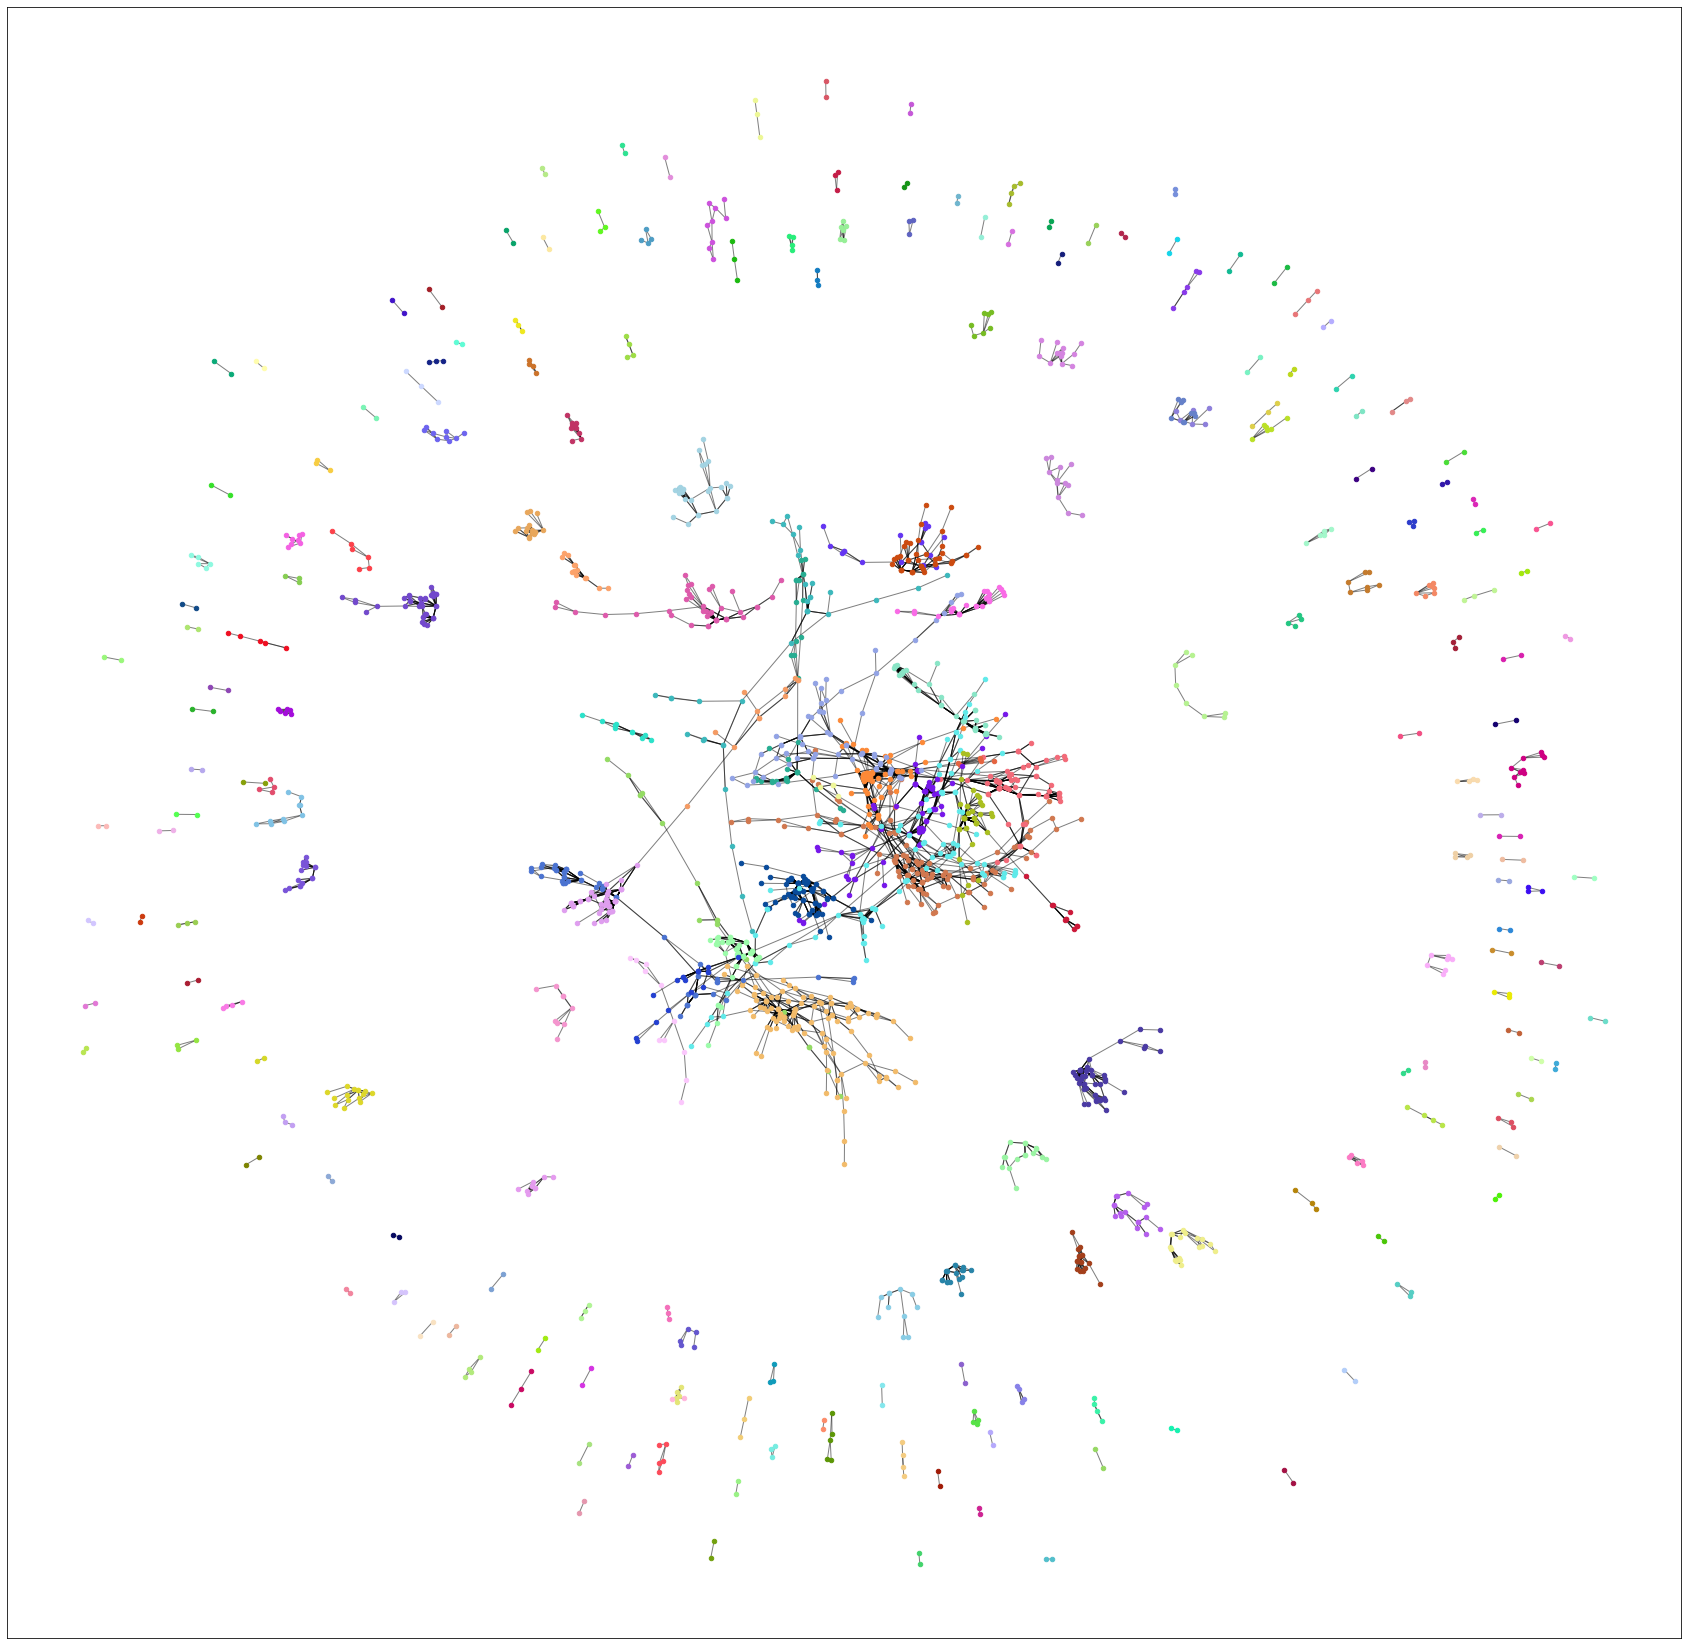

In [113]:
#drawing only nodes with edges
fig = plt.figure()
fig.set_figheight(30)
fig.set_figwidth(30)
size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20,
                                node_color = randomcolor.RandomColor().generate()[0])


nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

In [114]:
## Code to change color in json
color_dictionary


{'island': '#2425c7',
 '0': '#3ba648',
 '141': '#98899c',
 '92': '#33c31f',
 '39': '#398b4b',
 '8': '#eb54e0',
 '110': '#b95ede',
 '186': '#30d85b',
 '9': '#62a143',
 '217': '#a6c968',
 '5': '#7ebf65',
 '108': '#2815c2',
 '43': '#747a6f',
 '79': '#2b58f2',
 '117': '#6df2db',
 '11': '#544625',
 '2': '#3658cc',
 '4': '#badb5a',
 '41': '#4f453a',
 '95': '#efa643',
 '78': '#329cb8',
 '16': '#4b9413',
 '109': '#6b2c44',
 '10': '#6f6d0c',
 '63': '#cfda21',
 '119': '#9e579f',
 '26': '#aad4f2',
 '173': '#ad5d5a',
 '87': '#4a086a',
 '27': '#7efe1f',
 '13': '#dc0f97',
 '45': '#82d7d2',
 '135': '#d39ec7',
 '57': '#aa425b',
 '69': '#2fecb2',
 '204': '#639887',
 '22': '#7013a6',
 '1': '#629b55',
 '162': '#954413',
 '31': '#2cc1cc',
 '90': '#5667a2',
 '131': '#f98df0',
 '83': '#253462',
 '164': '#47a20f',
 '35': '#a2fd77',
 '214': '#00f2c0',
 '66': '#fc3074',
 '38': '#7b2226',
 '174': '#75f305',
 '156': '#3bbbe4',
 '98': '#76a32b',
 '52': '#e55476',
 '29': '#8a9021',
 '124': '#8a48e0',
 '46': '#eb27

In [115]:
###Only if you need to edit the graph json files

# def filter_dict(d, filter_string):
# #     print(filter_string)
#     for key, val in d.items():
#         if filter_string != key:
#             continue
#         return key, val

# with open('../../visualization/data/graph.json') as graph_json_file:
#     data = json.load(graph_json_file)
#     for node in data['nodes']:
#         if(node['group_id'] == ""):
#             node['group_id']= "island"    
# #             print(node)
    
#     for node in data['nodes']:
#         key,val = filter_dict(color_dictionary, str(node['group_id']))
#         node['color_code'] = val
#         print(node)


In [116]:
#Resave as JSON

# graph = {
#     "nodes" : data['nodes'],
#     "links": data['links']
# }

# with open("../generated-data/graph.json", 'w') as file:
#     json.dump(graph, file)

In [117]:
import pandas as pd

In [118]:
signs_latest_csv = pd.read_csv('../signdata-07-08-2020.csv')

FileNotFoundError: [Errno 2] No such file or directory: '../signdata-07-08-2020.csv'

In [ ]:
signs_latest_csv['Iconicity(Z)'].max()